In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
from matplotlib import pyplot as plt

# Map1D_TM
---

In [3]:
from gpt.maps import Map1D_TM

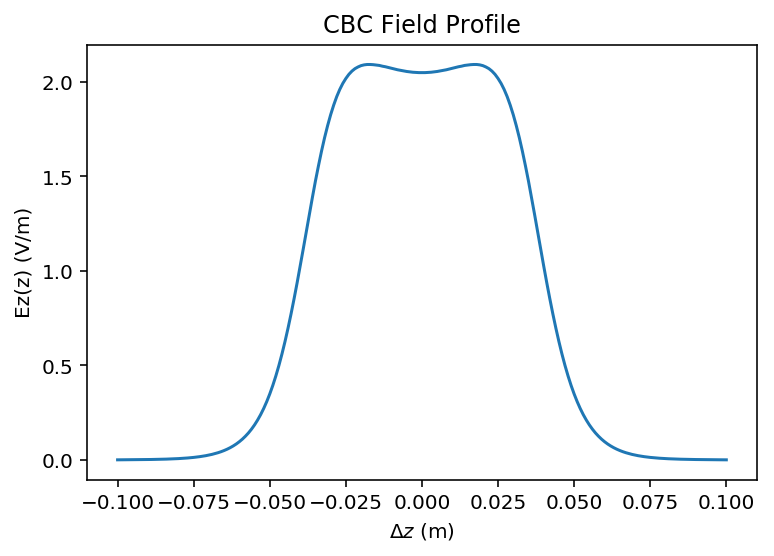

In [28]:
cav = Map1D_TM('Buncher', 'fields/buncher_CTB_1D.gdf', column_names={'Z':'z', 'Ez':'Ez'}, frequency=1.3e9)

plt.plot(cav['Z'], cav['Ez']);
plt.xlabel('$\Delta z$ (m)');
plt.ylabel('Ez(z) (V/m)');
plt.title('CBC Field Profile');

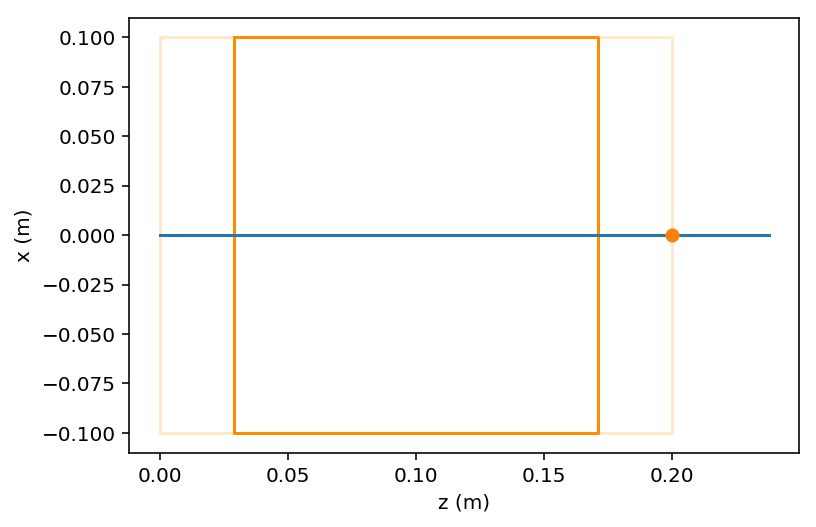

In [46]:
G = cav.track_on_axis(t=0, p=1e6)

cav.plot_floor()
plt.plot(G.stat('mean_z','tout'), G.stat('mean_x', 'tout'));
plt.plot(G.stat('mean_z','screen'), G.stat('mean_x', 'screen'), 'o');

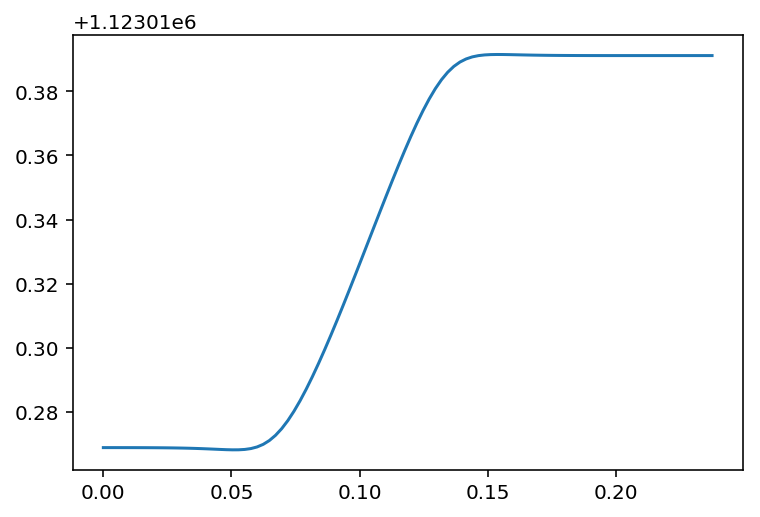

In [47]:
plt.plot(G.stat('mean_z','tout'), G.stat('mean_energy', 'tout'));